In [1]:
# Import Library
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
# Connect to Database
# Database save in local folder Jupyter Notebook

con = sqlite3.connect('olist.db')


In [3]:
# Make a Cursor
cur = con.cursor()

# Define Table in Database 
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
table_list

[('olist_order_customer_dataset',),
 ('olist_order_dataset',),
 ('olist_order_reviews_dataset',),
 ('olist_order_payments_dataset',),
 ('olist_order_items_dataset',),
 ('olist_products_dataset',),
 ('olist_sellers_dataset',),
 ('olist_geolocation_dataset',),
 ('product_category_name_translation',)]

#### Make DataFrame for each table and also manipulation data using 'parse_dates' for dates


In [4]:
customer = pd.read_sql('select * from olist_order_customer_dataset',  con).drop('index', axis=1)
customer.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
order = pd.read_sql('select * from olist_order_dataset',  con, parse_dates = ['order_purchase_timestamp', 'order_approved_at',
                                                                             'order_delivered_carrier_date',
                                                                             'order_delivered_customer_date',
                                                                             'order_estimated_delivery_date']).drop('index', axis=1)
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [6]:
Review = pd.read_sql('select * from olist_order_reviews_dataset',  con).drop('index', axis=1)
Review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
payment = pd.read_sql('select * from olist_order_payments_dataset',  con).drop('index', axis=1)
payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
item = pd.read_sql('select * from olist_order_items_dataset', con, parse_dates=['shipping_limit_date'] ).drop('index', axis=1)
item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
product = pd.read_sql('select * from olist_products_dataset', con).drop('index', axis=1)
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
seller = pd.read_sql('select * from olist_sellers_dataset', con).drop('index', axis=1)
seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
geo = pd.read_sql('select * from olist_geolocation_dataset', con).drop('index', axis=1)
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [12]:
category = pd.read_sql('select * from product_category_name_translation',  con).drop('index', axis=1)
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# Objective

Determine the Objective from the table:
1. Find out sales or orders every month.
2. Determine the total product categories (max = 10 & min 5).
3. Determine the total order based on each state.
4. The most common type of payment.
5. Analyze order status.




### A. Data Wrangling 


In [13]:
# Join the tables
table1 = pd.merge(order[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']], payment, on = 'order_id', how ='left')
table2 = table1.merge(customer, on = 'customer_id', how ='left')
table3 = table2.merge(item, on = 'order_id', how = 'left')
table4 = table3.merge(product, on = 'product_id', how = 'left')
table5 = table4.merge(category, on = 'product_category_name', how = 'left')

# Drop some coloumns 
table_New = table5.drop(['payment_installments', 
                         'payment_sequential', 
                         'customer_unique_id',
                        'customer_zip_code_prefix',
                        'customer_city', 'seller_id',
                        'shipping_limit_date', 
                        'price', 'order_item_id',
                        'freight_value',
                        'product_name_lenght',
                        'product_description_lenght',
                        'product_description_lenght',
                        'product_photos_qty', 
                        'product_weight_g',
                        'product_length_cm',
                        'product_height_cm',
                         'product_category_name',
                        'product_width_cm'], axis=1)

table_New.head()

,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_value,customer_state,product_id,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,credit_card,18.12,SP,87285b34884572647811a353c7ac498a,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,voucher,2.00,SP,87285b34884572647811a353c7ac498a,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,voucher,18.59,SP,87285b34884572647811a353c7ac498a,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,boleto,141.46,BA,595fac2a385ac33a80bd5114aec74eb8,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,credit_card,179.12,GO,aa4383b373c6aca5d8797843e5594415,auto


In [14]:
# Check information about our new table
table_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118434 non-null  object        
 1   customer_id                    118434 non-null  object        
 2   order_status                   118434 non-null  object        
 3   order_purchase_timestamp       118434 non-null  datetime64[ns]
 4   payment_type                   118431 non-null  object        
 5   payment_value                  118431 non-null  float64       
 6   customer_state                 118434 non-null  object        
 7   product_id                     117604 non-null  object        
 8   product_category_name_english  115881 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 9.0+ MB


### B. Data Cleaning 

#### 1. Missing Data


In [15]:
# Detect NaN Value
table_New.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
payment_type                        3
payment_value                       3
customer_state                      0
product_id                        830
product_category_name_english    2553
dtype: int64

#### From data, we know there is  missing data values in our data, so we can do manipulation data
1. payment_type ---> change 'null' to mode
2. payment_value ---> change 'null' to median
3. product_id ---> change 'null' to 'unknown'
4. product_category_name_english ---> change 'null' to 'unknown'

<Axes: xlabel='payment_value', ylabel='Count'>

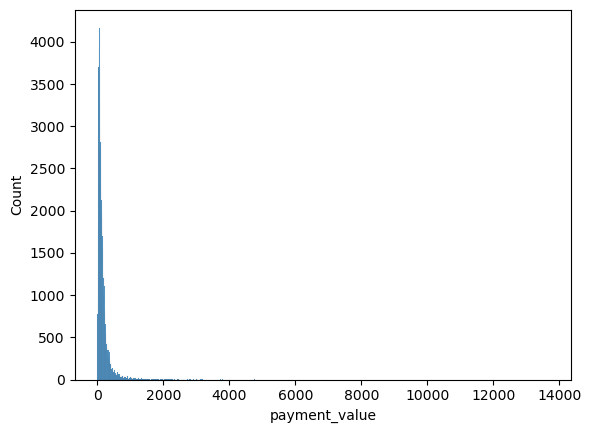

In [16]:
# Histogram Plot Payment_value
sns.histplot(data=table_New,x="payment_value")

<Axes: xlabel='payment_type', ylabel='Count'>

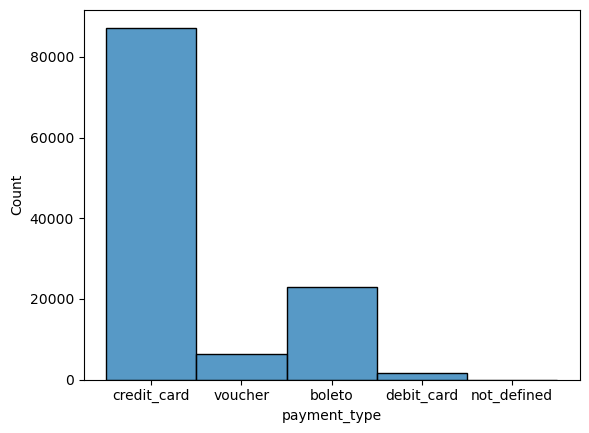

In [17]:
# Histogram Plot Payment_type
sns.histplot(data=table_New,x="payment_type")

#### From Histogram Plot above, we can get conclusion to cleaning the data, for payment_type used mode and payment_value used median

In [18]:
# Impute payment_type using mode
table_New['payment_type'] = table_New['payment_type'].fillna(table_New['payment_type'].mode()[0])

# Impute payment_type using mode
table_New['payment_value'] = table_New['payment_value'].fillna(table_New['payment_value'].median())
table_New.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
payment_type                        0
payment_value                       0
customer_state                      0
product_id                        830
product_category_name_english    2553
dtype: int64

#### And for product_id used mode and product_category_name_english changed to unknown

In [19]:
# Impute payment_type using mode
table_New['product_id'] = table_New['product_id'].fillna(table_New['product_id'] == 'unknown')

# Impute payment_type using mode
table_New['product_category_name_english'] = table_New['product_category_name_english'].fillna(table_New['product_category_name_english']== 'unknown')

# Checking NaN after manipulation data
table_New.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
payment_type                     0
payment_value                    0
customer_state                   0
product_id                       0
product_category_name_english    0
dtype: int64

From information above, we already clean the NaN or missing data.

#### 2. Handling Outlier


In [20]:
table_New.describe()

,payment_value
count,118434.000000
mean,172.847757
std,268.256631
min,0.000000
25%,60.860000
50%,108.200000
75%,189.240000
max,13664.080000


<Axes: xlabel='payment_value', ylabel='product_category_name_english'>

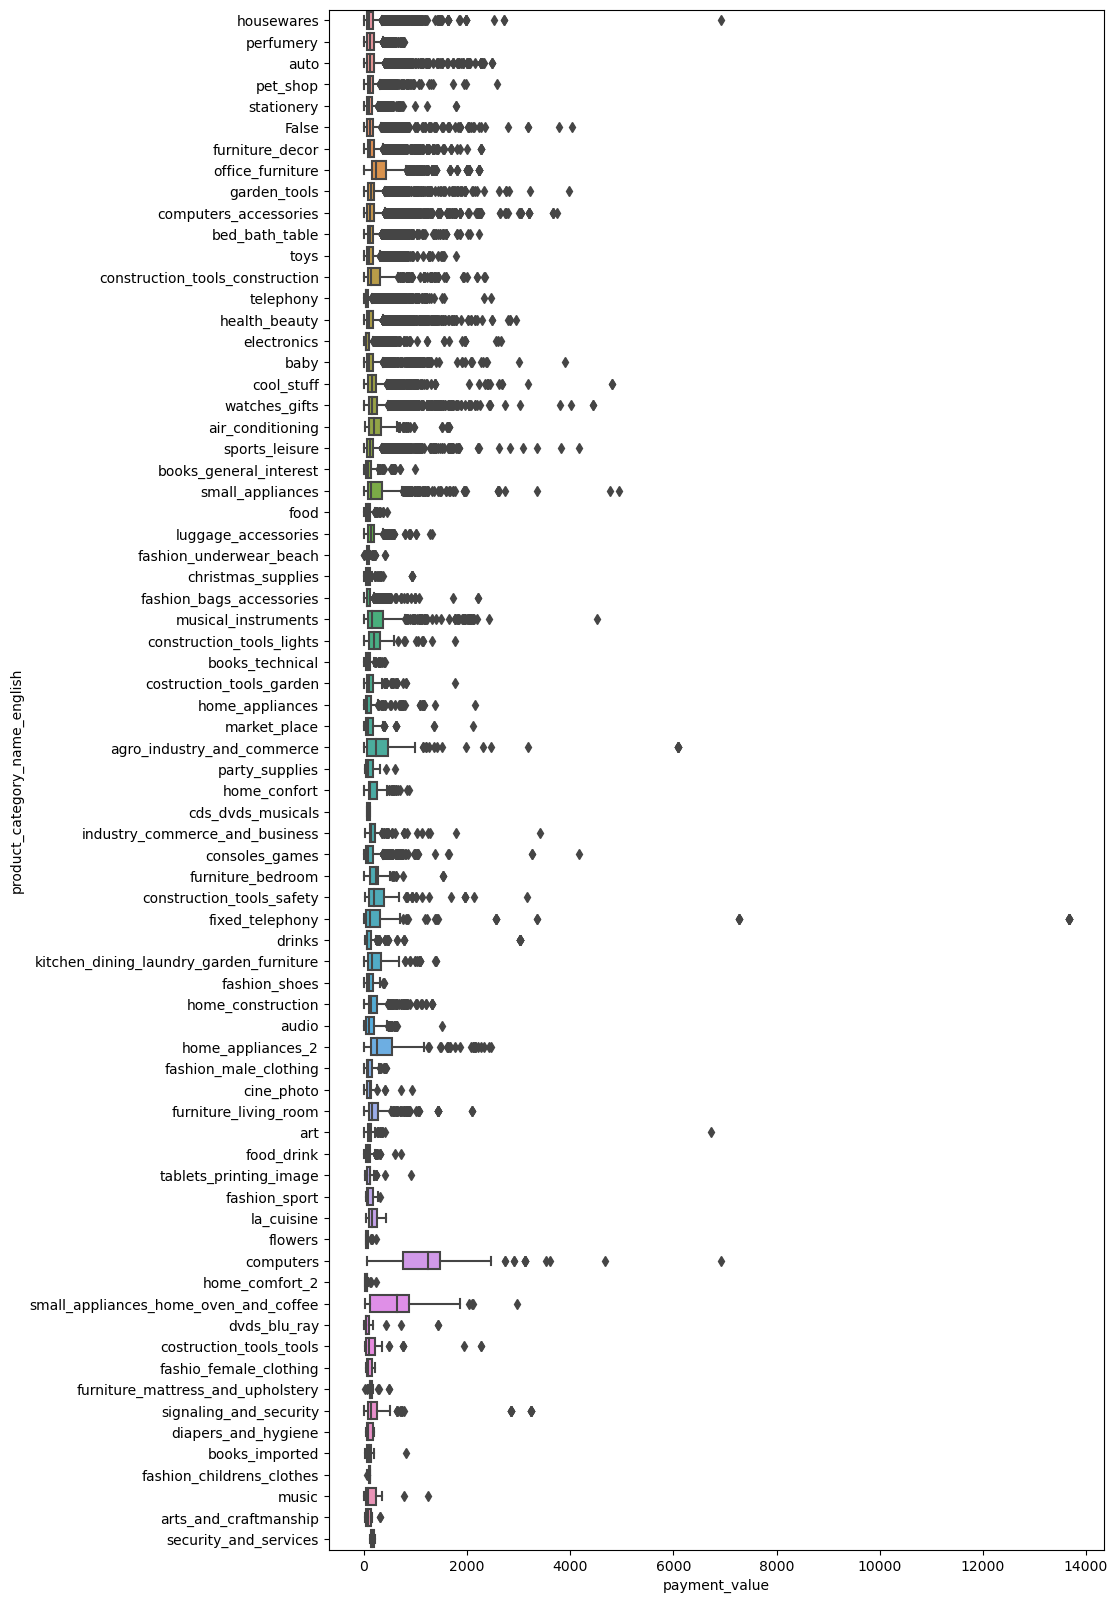

In [21]:
# Make boxplot as vizualitation data to know about outlier using seaborn
fig = plt.figure(figsize=(10, 20))
sns.boxplot(data=table_New, x="payment_value", y="product_category_name_english")

In [22]:
# Check max value on coloumn payment_value in table 
table_New[table_New['payment_value'] == table_New['payment_value'].max()]

,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_value,customer_state,product_id,product_category_name_english
15820,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,credit_card,13664.08,RJ,5769ef0a239114ac3a854af00df129e4,fixed_telephony
15821,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,credit_card,13664.08,RJ,5769ef0a239114ac3a854af00df129e4,fixed_telephony
15822,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,credit_card,13664.08,RJ,5769ef0a239114ac3a854af00df129e4,fixed_telephony
15823,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,credit_card,13664.08,RJ,5769ef0a239114ac3a854af00df129e4,fixed_telephony
15824,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,credit_card,13664.08,RJ,5769ef0a239114ac3a854af00df129e4,fixed_telephony
15825,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,credit_card,13664.08,RJ,5769ef0a239114ac3a854af00df129e4,fixed_telephony
15826,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,credit_card,13664.08,RJ,5769ef0a239114ac3a854af00df129e4,fixed_telephony
15827,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,credit_card,13664.08,RJ,5769ef0a239114ac3a854af00df129e4,fixed_telephony


From the data above we know there is outlier, it is known that the maximum payment value is max 13664.08 for the product category fixed_telephony.
Therefore we will check the price for the order_id of the item.

In [23]:
# Check price for product_id in table item
item.loc[item['order_id'] == '03caa2c082116e1d31e67e9ae3700499' ]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1647,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1648,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1649,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1650,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01


From the data in table item, we can change the payment_value with price.

In [24]:
# replace data for order_id has outlier
#df = pd.DataFrame(warna)
table_New['payment_value'] = table_New['payment_value'].replace(13664.08, 1680.0)
table_New.describe()

,payment_value
count,118434.000000
mean,172.038254
std,244.580518
min,0.000000
25%,60.860000
50%,108.200000
75%,189.240000
max,7274.880000


From the information data above, we know there is outlier and we change or manipulated the data. 
And for other categories such as art, computers, houseware and other electric goods, they are not necessarily outliers because usually some goods are expensive.

#### 3. Duplicate Data

In [25]:
# Detect the duplicate Values
table_New[table_New.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_value,customer_state,product_id,product_category_name_english
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,credit_card,259.06,RJ,08574b074924071f4e201e151b152b4e,garden_tools
60,9faeb9b2746b9d7526aef5acb08e2aa0,79183cd650e2bb0d475b0067d45946ac,delivered,2018-07-26 14:39:59,credit_card,151.04,RS,f48eb5c2fde13ca63664f0bb05f55346,sports_leisure
66,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,credit_card,91.68,SE,b37b72d5a56f887725c2862184b8cab8,telephony
76,f271576bed568e896f99eb710cd3a6f8,5dda11942d4f77bee3a46d71e442aec4,delivered,2018-01-07 21:44:54,credit_card,824.76,BA,d457916b4fdc60154ed93b5dd3e6fd69,construction_tools_construction
79,68e48e68da1f50f7c5838ea75e3a20dd,4afc1dcca5fe8926fc97d60a4497f8ab,delivered,2018-06-18 16:02:23,credit_card,392.60,SP,a659cb33082b851fb87a33af8f0fff29,auto
...,...,...,...,...,...,...,...,...,...
118353,dbd4cbb492a12b99c5224014930acc18,a14f464b2a19d761f7f3f0885d5ea955,delivered,2017-03-26 14:12:46,debit_card,140.90,SP,d34efb58e1930773fcde9b951892b1b1,housewares
118375,83db27f85506380229913b0dfdf5cd18,472acc24324ad4cee482fe4ef5910dc1,delivered,2018-04-18 12:35:58,boleto,398.18,RJ,86f2416d4670e4ea3ca5494d043d9f24,office_furniture
118383,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,credit_card,239.50,SP,4f18ca9862f511ecba98258b2194d061,furniture_bedroom
118402,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,credit_card,748.24,SP,0df37da38a30a713453b03053d60d3f7,sports_leisure


There is 11.236 data duplicate and we need to clean the data

In [26]:
# Drop duplicate value from coloumn
table_New.drop_duplicates(keep='first', inplace=True, ignore_index=True)
table_New

,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_value,customer_state,product_id,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,credit_card,18.12,SP,87285b34884572647811a353c7ac498a,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,voucher,2.00,SP,87285b34884572647811a353c7ac498a,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,voucher,18.59,SP,87285b34884572647811a353c7ac498a,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,boleto,141.46,BA,595fac2a385ac33a80bd5114aec74eb8,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,credit_card,179.12,GO,aa4383b373c6aca5d8797843e5594415,auto
...,...,...,...,...,...,...,...,...,...
107193,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,credit_card,85.08,SP,ac35486adb7b02598c182c2ff2e05254,health_beauty
107194,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,credit_card,195.00,SP,f1d4ce8c6dd66c47bbaa8c6781c2a923,baby
107195,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,credit_card,271.01,BA,b80910977a37536adeddd63663f916ad,home_appliances_2
107196,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,credit_card,441.16,RJ,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories


## ANALYSIS OBJECTIVE

Determine the Objective from the table:
1. Find out sales or orders every month.
2. Determine the total product categories (max = 10 & min 5).
3. Determine the total order based on each state.
4. The most common type of payment.
5. Analyze order status.


### 1. Find out sales or orders every month.

In [27]:
# Make a new coloumn for year & month
table_New['year_month'] = [x.strftime('%Y - %m') for x in table_New.order_purchase_timestamp]
table_New.head()


,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_value,customer_state,product_id,product_category_name_english,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,credit_card,18.12,SP,87285b34884572647811a353c7ac498a,housewares,2017 - 10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,voucher,2.00,SP,87285b34884572647811a353c7ac498a,housewares,2017 - 10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,voucher,18.59,SP,87285b34884572647811a353c7ac498a,housewares,2017 - 10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,boleto,141.46,BA,595fac2a385ac33a80bd5114aec74eb8,perfumery,2018 - 07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,credit_card,179.12,GO,aa4383b373c6aca5d8797843e5594415,auto,2018 - 08


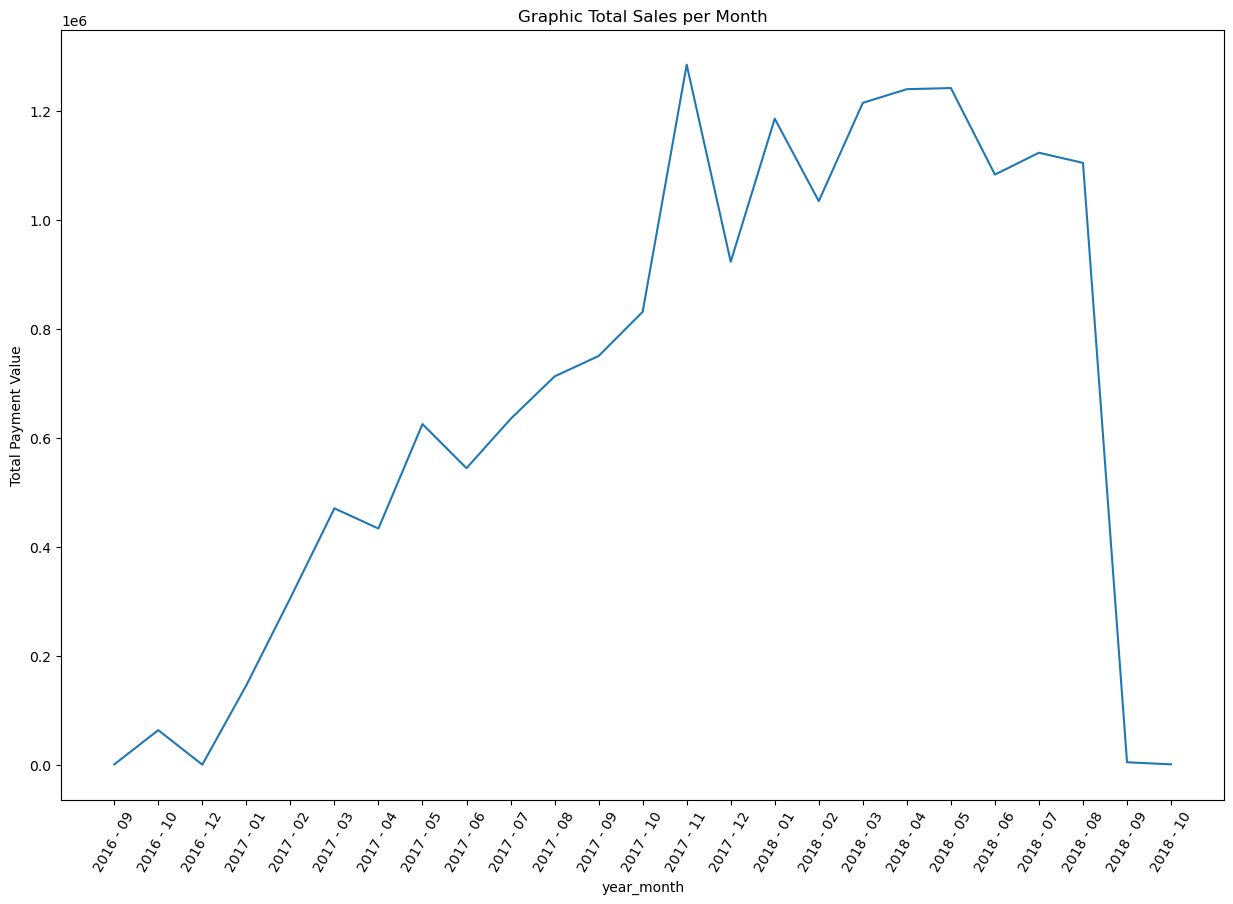

In [28]:
# Group by year_month total payment
date_payment = table_New[['year_month', 'payment_value']].groupby("year_month").sum().reset_index()

# Sort from the oldest data
date_payment.sort_index(ascending=True)

# line plot year_month vs total payment_value
fig = plt.figure(figsize=(15, 10))
sns.lineplot(data=date_payment, x="year_month", y="payment_value")
plt.xticks(rotation=60)
plt.ylabel("Total Payment Value")
plt.title("Graphic Total Sales per Month")
plt.show()

### 2. Determine the total product categories (max = 10 & min 5).

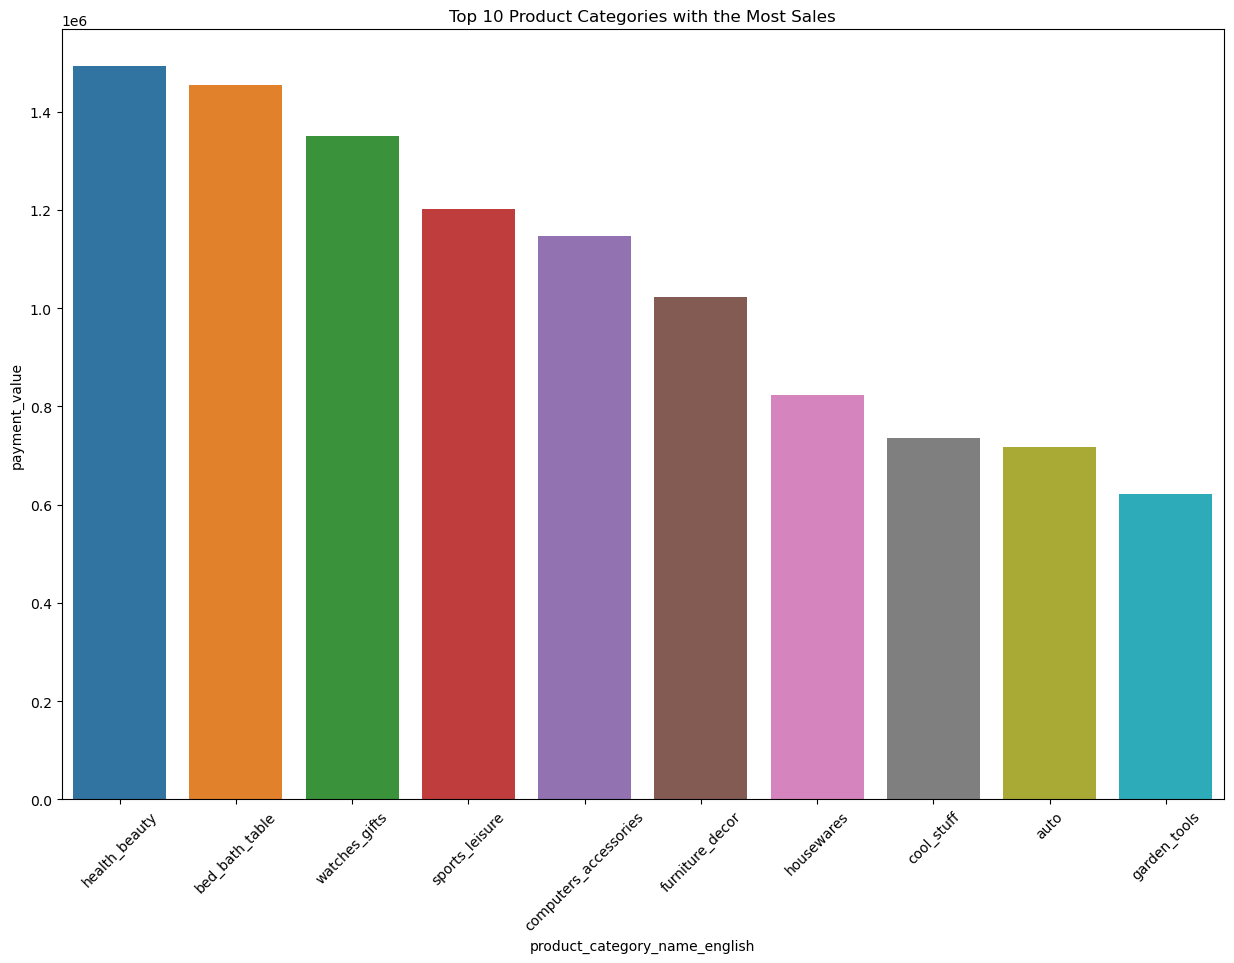

In [29]:
# Groupby value payment each categories
category_each_sales = table_New[['product_category_name_english', 'payment_value']].groupby("product_category_name_english").sum()
category_each_sales = category_each_sales.reset_index()

# Filter top 10 categories largest total sales value
category_each_sales = category_each_sales.sort_values('payment_value', ascending=False)[:10]

# Make a barplot using seaborn
fig = plt.figure(figsize=(15, 10))
sns.barplot(data=category_each_sales , x="product_category_name_english", y="payment_value", order=category_each_sales.sort_values('payment_value', ascending=False).product_category_name_english)
plt.xticks(rotation=45)
plt.title("Top 10 Product Categories with the Most Sales")
plt.show()

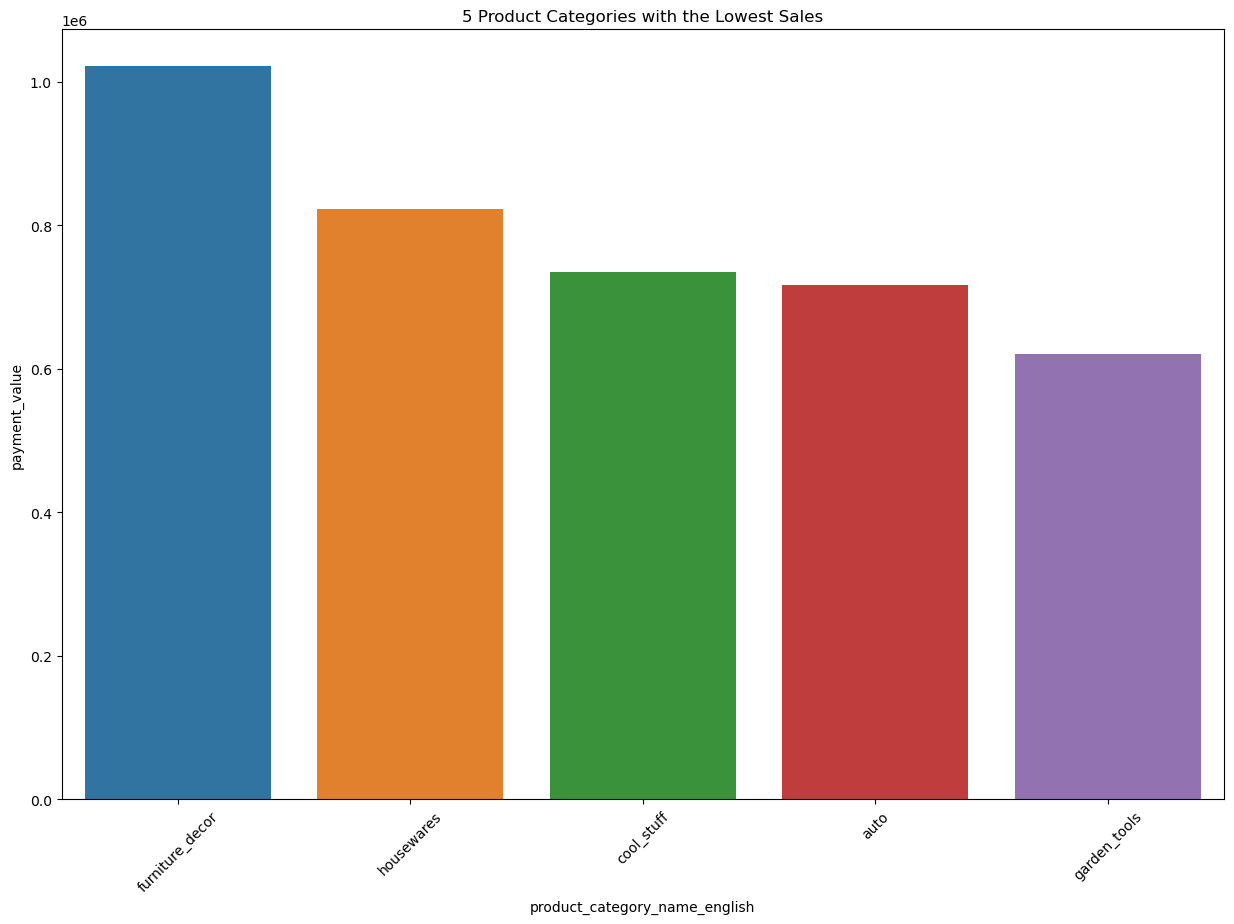

In [30]:
# Take 5 Product Categories with the Lowest Sale
category_each_sales = category_each_sales.sort_values('payment_value', ascending=False)[-5:]

# Filter top 5 categories lowest
fig = plt.figure(figsize=(15, 10))
sns.barplot(data=category_each_sales , x="product_category_name_english", y="payment_value", order=category_each_sales.sort_values('payment_value', ascending=False).product_category_name_english)
plt.xticks(rotation=45)
plt.title("5 Product Categories with the Lowest Sales")
plt.show()

### 3. Determine the total order based on each state.

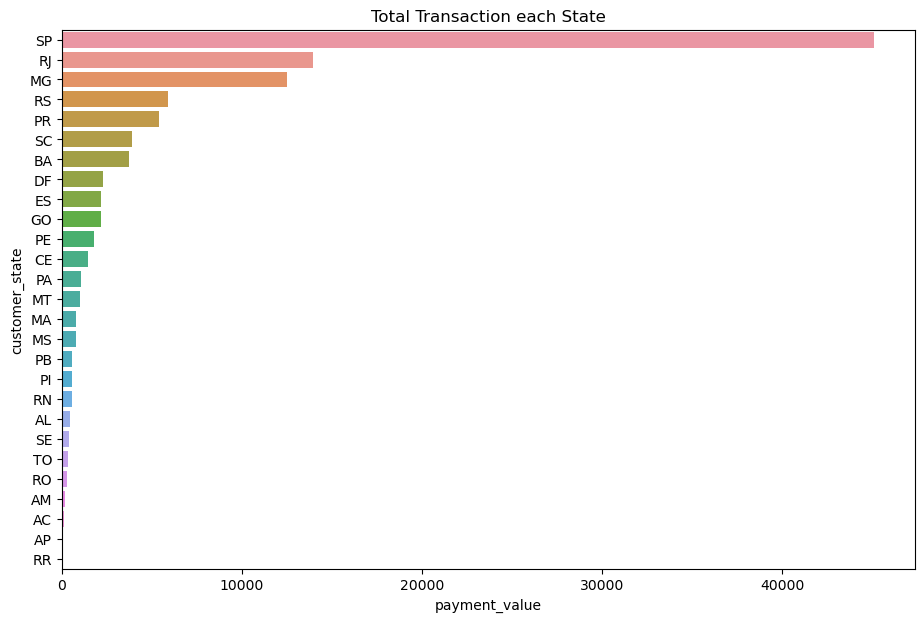

In [31]:
# groupby payment each state
state_sale_count = table_New[['customer_state', 'payment_value']].groupby("customer_state").count()
state_sale_count = state_sale_count.reset_index()

# barplot for payment each state
fig = plt.figure(figsize=(11, 7))
sns.barplot(data=state_sale_count, y="customer_state", x="payment_value", order=state_sale_count.sort_values('payment_value', ascending=False).customer_state)
plt.title("Total Transaction each State")
plt.show()

### 4. The most common type of payment.

In [32]:
table_New['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card', 'not_defined'],
      dtype=object)

In [33]:
table_New.loc[table_New['payment_type'] == 'not_defined' ]

,order_id,customer_id,order_status,order_purchase_timestamp,payment_type,payment_value,customer_state,product_id,product_category_name_english,year_month
1226,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,not_defined,0.0,SP,False,False,2018 - 08
43057,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,not_defined,0.0,SP,False,False,2018 - 09
43396,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,not_defined,0.0,SP,False,False,2018 - 08


In [34]:
# delete all rows with column 'payment_type' has value 'not_defined'
filter_data = table_New[(table_New['payment_type'] == 'not_defined')].index
table_New1 = table_New.drop(filter_data)                      

# Check unique data in coloumn 'payment_type'
table_New1['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card'], dtype=object)

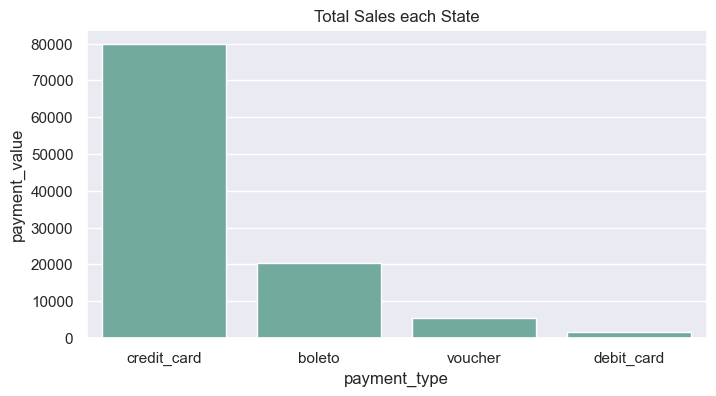

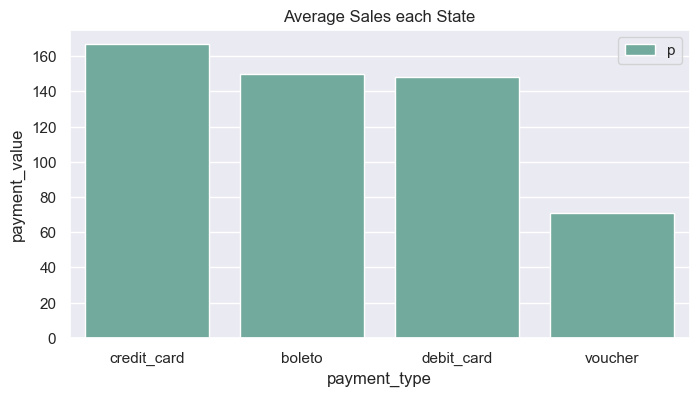

In [50]:
# groupby payment_value each payment_type
payment_category = table_New1[['payment_type', 'payment_value']].groupby("payment_type").count()
payment_category = payment_category.reset_index()

# set plot style: grey grid in the background:
sns.set(style="darkgrid")


# Set the figure size
fig = plt.figure(figsize=(8, 4))

# plot a bar chart
sns.barplot(x="payment_type", y= "payment_value", data=payment_category, order=payment_category.sort_values('payment_value', ascending=False).payment_type, estimator=sum, errorbar=None, color='#69b3a2')
plt.title("Total Sales each State")
plt.show()

# groupby payment_value each payment_type
payment_category = table_New1[['payment_type', 'payment_value']].groupby("payment_type").mean()
payment_category = payment_category.reset_index()

# set plot style: grey grid in the background:
sns.set(style="darkgrid")


# Set the figure size
fig = plt.figure(figsize=(8, 4))

# plot a bar chart
sns.barplot(x="payment_type", y= "payment_value", data=payment_category, order=payment_category.sort_values('payment_value', ascending=False).payment_type, estimator=sum, errorbar=None, color='#69b3a2')
plt.title("Average Sales each State")

plt.show()

### 5. Analyze order status.

In [36]:
table_New['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

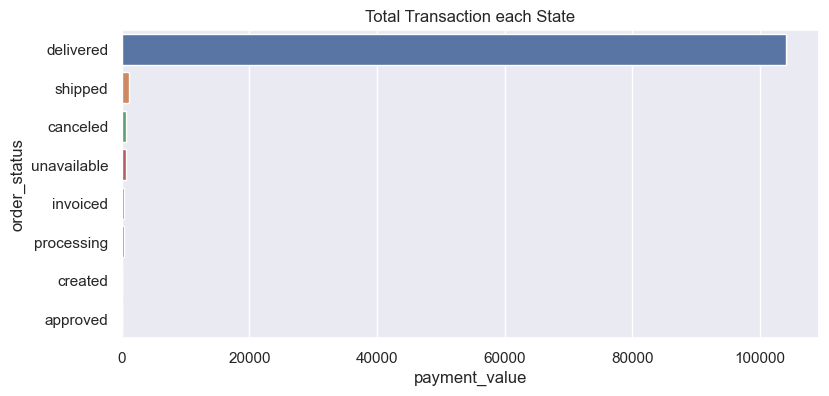

In [37]:
# Groupby payment value by order status
order_status_count = table_New[['order_status', 'payment_value']].groupby("order_status").count()
order_status_count = order_status_count.reset_index()

# barplot
fig = plt.figure(figsize=(9, 4))
sns.barplot(data=order_status_count, y="order_status", x="payment_value", order=order_status_count.sort_values('payment_value', ascending=False).order_status)
plt.title("Total Transaction each State")
plt.show()

In [53]:
# 
order_status_count.sort_values('payment_value', ascending=False)[:8]

,order_status,payment_value
3,delivered,104060
6,shipped,1181
1,canceled,657
7,unavailable,641
4,invoiced,334
5,processing,318
2,created,5
0,approved,2
